### Importing Libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold,cross_val_score

### Reading Dataset

In [6]:
df= pd.read_csv('../dataset/heart_disease_data.csv')
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [7]:
df.isna().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

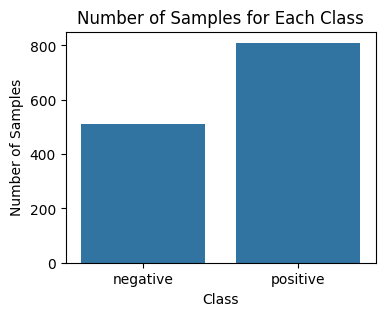

In [9]:
plt.figure(figsize=(4, 3))
sns.countplot(x=df['class'], data=df)
plt.title('Number of Samples for Each Class')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()

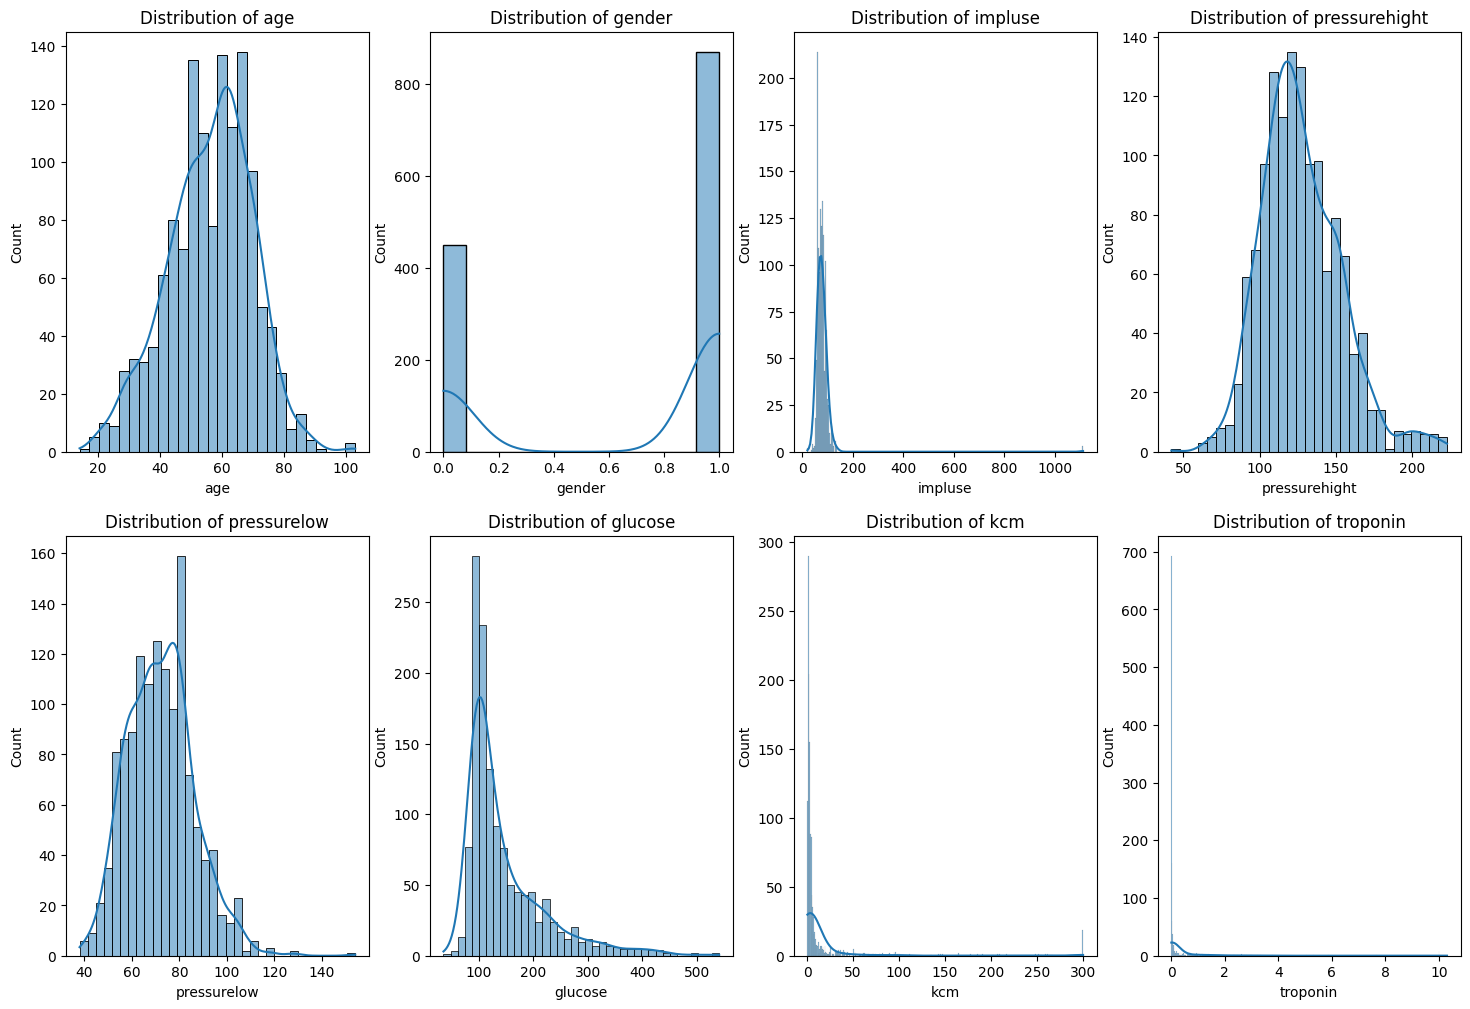

In [10]:
cols = df.drop('class',axis=1)
plt.figure(figsize=(18, 12))
for i, column in enumerate(cols.columns):
    plt.subplot(2, 4, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

In [11]:
cols = df.drop('class',axis=1)
for column in cols.columns:
    sek = df[column].skew()
    if(sek < 0) :
        sek = -sek 
    print(sek)
    if sek == 0:
        print ('Normal')
    elif -0.5 <= sek <= 0.5:
        print('Approximately Symmetric')
    elif sek >= 1 or sek <= 1:
        print('Skewed')

0.23921873824246861
Approximately Symmetric
0.6743628337800194
Skewed
18.24771989662879
Skewed
0.6852460958110306
Skewed
0.48920228416877803
Approximately Symmetric
1.933474909905609
Skewed
4.978095271058858
Skewed
5.799106921990377
Skewed


In [14]:
df['class_en'] = LabelEncoder().fit_transform(df['class'])

In [15]:
x= df.drop(['class_en','class'],axis=1)
y = df['class_en']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and fit the RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
import xgboost as xgb 
xg_model= xgb.XGBClassifier()
xg_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [17]:
y_pred_rf= random_forest.predict(x_test)
y_pred_xgb=xg_model.predict(x_test)

In [18]:
report_rf= classification_report(y_pred_rf, y_test)
report_xgb=classification_report(y_pred_xgb, y_test)

In [20]:
print(report_rf)
print("==================================================================")
print(report_xgb)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       100
           1       0.99      0.98      0.98       164

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       100
           1       0.99      0.98      0.98       164

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



In [21]:
import joblib

joblib.dump(random_forest, '../models/random_forest_classifer.clf')
joblib.dump(xg_model, '../models/xgboost_classifer.clf')

['../models/xgboost_classifer.clf']